<a href="https://colab.research.google.com/github/yogita5/ML_bootcamp/blob/main/Logistic_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt

url_train = "https://raw.githubusercontent.com/yogita5/test/main/classification_train%20(1).csv"
url_test = "https://raw.githubusercontent.com/yogita5/test/main/classification_test%20(1).csv"
df_train = pd.read_csv(url_train)
df_test = pd.read_csv(url_test)
train_data = df_train.values
test_data = df_test.values

In [2]:
X_train = train_data[:,2:]
y_train = train_data[:,1]
X_test = test_data[:,1:]

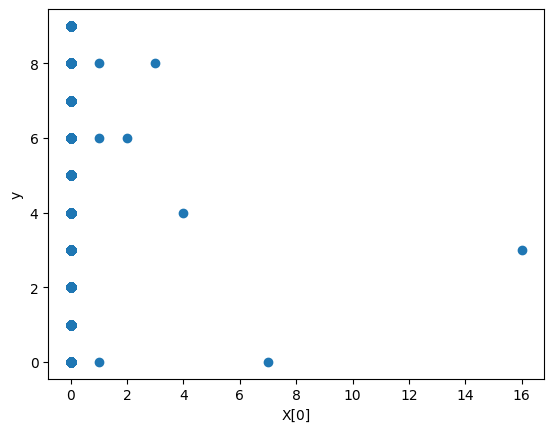

In [3]:
plt.scatter(X_train[:,0],y_train)
plt.xlabel("X[0]")
plt.ylabel("y")
plt.show()

In [4]:
#normalization
def normalization(X):
      mu = np.mean(X,axis=0)
      sigma = np.std(X,axis=0)
      X_norm = (X-mu)/sigma
      return(X_norm,mu,sigma)

In [5]:
#training set for 1 vs all
def one_vs_all(y):
  y_vs = np.zeros([y.shape[0],np.amax(y)+1])
  for i in range(np.amax(y)+1):
    y_vs[:,i] = np.where(y == i,1,0)
  return y_vs

In [6]:
def linear_z(X,w,b):
  z = np.dot(X,w) + b
  z = np.array(z,dtype = np.float128)
  return(z)

In [7]:
def sigmoid(z):
  fw_b = 1/(1+np.exp(-z))
  return fw_b

In [8]:
def compute_cost(X,y,z,fw_b):
  m = X.shape[0]
  epsilon = 1e-5
  loss = -y*np.log(fw_b + epsilon) - (1-y)*np.log(1-fw_b + epsilon) 
  cost = np.sum(loss,axis=0)
  cost = cost/m
  return cost

In [9]:
def compute_gradient(X,y,z,fw_b):
  m = X.shape[0]
  dj_dw = np.dot(X.T,fw_b-y)
  dj_db = np.sum(fw_b-y,axis=0)
  dj_dw/=m
  dj_db/=m
  return dj_dw,dj_db

In [10]:
def gradient_descent(X,y,w,b,alpha,iterations):
  j_history = []
  for i in range(iterations):
    z = linear_z(X,w,b)
    fw_b = sigmoid(z)
    dj_dw,dj_db = compute_gradient(X,y,z,fw_b)
    w = w - alpha*dj_dw
    b = b-alpha*dj_db
    if i<100000:
      cost = compute_cost(X,y,z,fw_b)
      j_history.append(cost)
    if i % (iterations/10) == 0 or i == iterations-1 :
      print(f"Iterations: {i}    Cost: {cost}      ")
  return w,b,j_history

In [11]:
X_norm,mu,sigma = normalization(X_train)
y_vs = one_vs_all(y_train)
w = np.zeros([X_train.shape[1],np.amax(y_train)+1])
b = np.zeros(np.amax(y_train)+1)
num_iter = 1000
alpha = 0.05
w,b,j_hist = gradient_descent(X_norm,y_vs,w,b,alpha,num_iter)

Iterations: 0    Cost: [0.69312718 0.69312718 0.69312718 0.69312718 0.69312718 0.69312718
 0.69312718 0.69312718 0.69312718 0.69312718]      
Iterations: 100    Cost: [0.25240363 0.15478438 0.28330978 0.24148246 0.27569208 0.25497047
 0.31471995 0.22245775 0.19719945 0.2046398 ]      
Iterations: 200    Cost: [0.18277045 0.09902955 0.21363482 0.16988324 0.20463023 0.1761523
 0.2476149  0.15034459 0.13482772 0.13514153]      
Iterations: 300    Cost: [0.1553423  0.07675188 0.1867833  0.14168922 0.17701459 0.14359318
 0.22213347 0.12108427 0.10786846 0.10526347]      
Iterations: 400    Cost: [0.14100022 0.06456332 0.17283858 0.12685737 0.16261774 0.12560862
 0.20896717 0.10543942 0.09269952 0.08896067]      
Iterations: 500    Cost: [0.13220177 0.0567664  0.16431321 0.1177084  0.15380455 0.11402463
 0.20094689 0.09568139 0.08286869 0.07875635]      
Iterations: 600    Cost: [0.12623656 0.05129338 0.15854673 0.11147481 0.14784342 0.10583331
 0.19554262 0.08897611 0.07591187 0.07177351]  

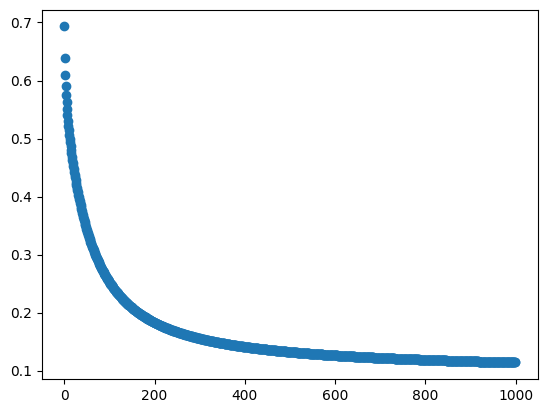

In [12]:
iter = np.arange(num_iter)
j_hist = np.array(j_hist)
plt.scatter(iter,j_hist[:,0])
plt.show()

In [13]:
def predict(X,w,b):
  z = linear_z(X,w,b)
  y = sigmoid(z)
  pred = np.array(y.shape[0])
  pred = np.argmax(y,axis=1)
  return pred

In [14]:
def accuracy(y_data,y_pred):
  c = 0
  for i in range(y_data.shape[0]):
    if y_data[i]==y_pred[i]:
      c+=1 
  acc_percent = c/y_data.shape[0]*100
  return acc_percent

In [15]:
y_pred = predict(X_norm,w,b)
print(accuracy(y_train,y_pred))

84.49666666666667


In [16]:
print(y_pred)

[7 4 1 ... 9 4 0]


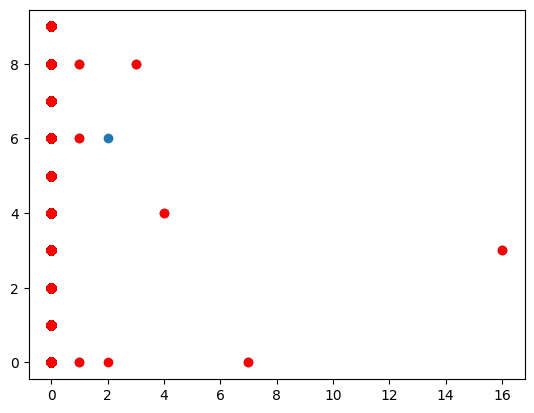

In [17]:
plt.scatter(X_train[:,0],y_train)
plt.scatter(X_train[:,0],y_pred,color='r')
plt.show()

In [18]:
X_normtest = (X_test-mu)/sigma
y_test = predict(X_normtest,w,b)

In [19]:
print(y_test)

[0 1 2 ... 8 6 2]


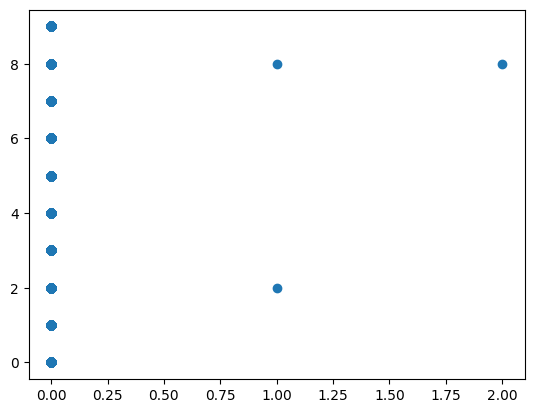

In [20]:
plt.scatter(X_test[:,0],y_test)
plt.show()

In [22]:
df_predicted = pd.DataFrame(data = y_test,index = df_test.ids)
df_predicted.to_csv('Logistic_predicted.csv')